# Climate Analysis
---

In [94]:
# imports
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sqlalchemy import text
from sqlalchemy import desc
from sqlalchemy import func


In [24]:
# create engine
engine = create_engine('sqlite:///hawaii.sqlite')

In [25]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [26]:
# map station class
Station = Base.classes.station

In [27]:
# map measurement class
Measurement = Base.classes.measurement

In [28]:
session = Session(bind=engine)

## Precipitation Analysis
---

Retrieve last 12 months of precipitation data.

In [85]:
def data_frame(query, columns):
    """
    Takes a sqlalchemy query and a list of columns, returns a dataframe.
    """
    def make_row(x):
        return dict([(c, getattr(x, c)) for c in columns])       
    return pd.DataFrame([make_row(x) for x in query])

prcp_query = session.query(Measurement).filter(Measurement.date > 
                                     datetime.datetime(2017, 4, 30)).all()

#dataframe with just two fields
prcp_df = data_frame(prcp_query, ['date', 'prcp'])

#For this graph, we will go ahead and fill NaN with zeroes with fillna and make a note on graph.
prcp_df = prcp_df.fillna(0)

# dataframe with all fields in the table
#df = data_frame(query, [c.name for c in Measurement.__table__.columns])
#what_df.count()

In [86]:
what_df.count()


date    644
prcp    644
dtype: int64

In [87]:
prcp_df_work = prcp_df.groupby(['date']).sum()

In [88]:
prcp_df_work.head(30)

,prcp
date,
2017-05-01,0.81
2017-05-02,0.05
2017-05-03,0.03
2017-05-04,0.08
2017-05-05,0.38
2017-05-06,0.06
2017-05-07,0.12
2017-05-08,3.01
2017-05-09,4.63


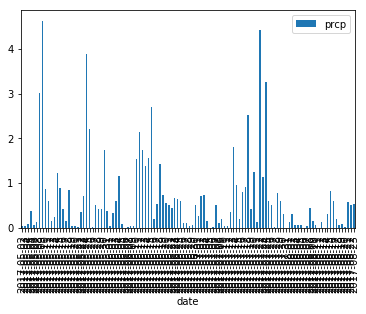

In [84]:
prcp_df_work.plot.bar()


In [90]:
#get a count of stations
print(f'There are {session.query(Station).count()} stations')

There are 9 stations


In [107]:
#list stations and observation counts in descending order
station_counts = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(desc(func.count(Measurement.station)))
for station in station_counts.all():
    print(station)
    






('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [108]:
print(station_counts.first())

('USC00519281', 2772)


In [114]:
most_observations = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == 'USC00519281').all()


most_observations_df = data_frame(most_observations, ['station', 'tobs'])

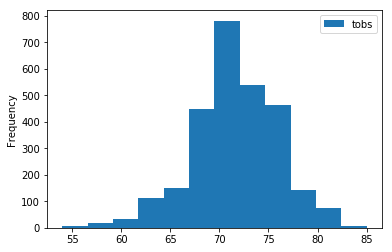

In [117]:
most_observations_df.plot.hist(by='tobs', bins=12)

In [ ]:
def calc_temps(start-date, end-date):
    session.query(Measurement.)